Pollution and Number of Diagnoses of Chronic Lower Respiratory Disorders! 

We apply Data Wrangling Techniques: 
    Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis. ... 
    This process typically includes manually converting and mapping data from one raw form into another format to allow for 
    more convenient consumption and organization of the data. 

# Importing Modules

In [1]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install country_converter --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import country_converter as coco
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Extract Data

Read the data from the dataset file

In [5]:
sdr64=pd.read_excel('HFAMDB_162_EN.xlsx')
sdr65=pd.read_excel('HFAMDB_168_EN.xlsx')
data_pollution=pd.read_excel('EEA_GHG_ESD_Dec 2020.xlsx')

In [6]:
sdr64.head()

,Measure code,AGE_GRP,SEX,COUNTRY_REGION,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,HFAMDB_162,0_64,ALL,ALB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HFAMDB_162,0_64,ALL,ARM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.60,4.38,4.16,5.12,4.44,2.83,1.95,1.96
2,HFAMDB_162,0_64,ALL,AUT,NaN,7.54,6.08,4.37,3.94,4.2,...,3.72,3.76,3.49,4.07,2.97,3.67,3.21,3.57,4.03,3.42
3,HFAMDB_162,0_64,ALL,AZE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HFAMDB_162,0_64,ALL,BLR,NaN,NaN,NaN,NaN,NaN,NaN,...,5.78,5.07,NaN,3.44,3.18,NaN,NaN,NaN,2.95,NaN


In [7]:
sdr65.head()

,Measure code,AGE_GRP,SEX,COUNTRY_REGION,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,HFAMDB_168,GTE65,ALL,ALB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HFAMDB_168,GTE65,ALL,ARM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,260.16,251.92,285.96,316.01,280.33,157.38,88.43,73.33
2,HFAMDB_168,GTE65,ALL,AUT,NaN,265.04,212.14,192.67,163.24,150.54,...,135.78,128.12,132.92,136.81,128.84,141.10,136.78,152.24,145.37,149.60
3,HFAMDB_168,GTE65,ALL,AZE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HFAMDB_168,GTE65,ALL,BLR,NaN,NaN,NaN,NaN,NaN,NaN,...,116.79,91.19,NaN,63.04,54.36,NaN,NaN,NaN,55.88,NaN


In [8]:
data_pollution.head()

,CountryLong,Year,ValueNumeric,Unit,Data_source
0,Austria,2005,56.281936,Mt CO2 eq.,EEA
1,Austria,2006,54.884044,Mt CO2 eq.,EEA
2,Austria,2007,52.846247,Mt CO2 eq.,EEA
3,Austria,2008,52.266769,Mt CO2 eq.,EEA
4,Austria,2009,50.640771,Mt CO2 eq.,EEA


# Data cleaning

## I. Greenhouse gas emissions under the Effort Sharing Decision (ESD)

In [9]:
data_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryLong   450 non-null    object 
 1   Year          450 non-null    int64  
 2   ValueNumeric  450 non-null    float64
 3   Unit          450 non-null    object 
 4   Data_source   450 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 17.7+ KB


Use the describe function to take the overview of the dataset

In [10]:
data_pollution.describe()

,Year,ValueNumeric
count,450.000000,450.000000
mean,2012.000000,253.931321
std,4.325302,610.101882
min,2005.000000,1.000892
25%,2008.000000,16.926939
50%,2012.000000,43.711526
75%,2016.000000,195.537172
max,2019.000000,2882.848156


Check the null values in the dataset. As we have no null values so we will start to visualize our data

In [11]:
data_pollution.isnull().sum()

CountryLong     0
Year            0
ValueNumeric    0
Unit            0
Data_source     0
dtype: int64

Check the country names in the dataset

In [12]:
data_pollution['CountryLong'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom',
       'EU-28', 'EU-27'], dtype=object)

In [13]:
data_pollution.head(11)

,CountryLong,Year,ValueNumeric,Unit,Data_source
0,Austria,2005,56.281936,Mt CO2 eq.,EEA
1,Austria,2006,54.884044,Mt CO2 eq.,EEA
2,Austria,2007,52.846247,Mt CO2 eq.,EEA
3,Austria,2008,52.266769,Mt CO2 eq.,EEA
4,Austria,2009,50.640771,Mt CO2 eq.,EEA
5,Austria,2010,51.729345,Mt CO2 eq.,EEA
6,Austria,2011,49.757941,Mt CO2 eq.,EEA
7,Austria,2012,49.248027,Mt CO2 eq.,EEA
8,Austria,2013,50.100000,Mt CO2 eq.,EEA
9,Austria,2014,48.190000,Mt CO2 eq.,EEA


We only need country values, so we can drop EU-27 and EU-28

In [14]:
data_pollution.drop(data_pollution[data_pollution["CountryLong"] == "EU-27"].index, inplace = True)
data_pollution.drop(data_pollution[data_pollution["CountryLong"] == "EU-28"].index, inplace = True)
data_pollution.dropna()

,CountryLong,Year,ValueNumeric,Unit,Data_source
0,Austria,2005,56.281936,Mt CO2 eq.,EEA
1,Austria,2006,54.884044,Mt CO2 eq.,EEA
2,Austria,2007,52.846247,Mt CO2 eq.,EEA
3,Austria,2008,52.266769,Mt CO2 eq.,EEA
4,Austria,2009,50.640771,Mt CO2 eq.,EEA
...,...,...,...,...,...
415,United Kingdom,2015,326.030000,Mt CO2 eq.,EEA
416,United Kingdom,2016,333.900000,Mt CO2 eq.,EEA
417,United Kingdom,2017,332.050000,Mt CO2 eq.,EEA
418,United Kingdom,2018,329.880406,Mt CO2 eq.,EEA


In [15]:
data_pollution["CountryCode"] = coco.convert(names=data_pollution["CountryLong"], to = 'ISO3', not_found='NaN')
data_pollution = data_pollution.iloc[:420, :]
data_pollution

,CountryLong,Year,ValueNumeric,Unit,Data_source,CountryCode
0,Austria,2005,56.281936,Mt CO2 eq.,EEA,AUT
1,Austria,2006,54.884044,Mt CO2 eq.,EEA,AUT
2,Austria,2007,52.846247,Mt CO2 eq.,EEA,AUT
3,Austria,2008,52.266769,Mt CO2 eq.,EEA,AUT
4,Austria,2009,50.640771,Mt CO2 eq.,EEA,AUT
...,...,...,...,...,...,...
415,United Kingdom,2015,326.030000,Mt CO2 eq.,EEA,GBR
416,United Kingdom,2016,333.900000,Mt CO2 eq.,EEA,GBR
417,United Kingdom,2017,332.050000,Mt CO2 eq.,EEA,GBR
418,United Kingdom,2018,329.880406,Mt CO2 eq.,EEA,GBR


## II. Standardised death rate (0-64) and (65+), Chronic lower respiratory diseases

First, we check info and shape of 2 datasets

In [16]:
sdr64.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Measure code    180 non-null    object 
 1   AGE_GRP         180 non-null    object 
 2   SEX             180 non-null    object 
 3   COUNTRY_REGION  180 non-null    object 
 4   1968            27 non-null     float64
 5   1969            66 non-null     float64
 6   1970            63 non-null     float64
 7   1971            75 non-null     float64
 8   1972            75 non-null     float64
 9   1973            75 non-null     float64
 10  1974            75 non-null     float64
 11  1975            78 non-null     float64
 12  1976            78 non-null     float64
 13  1977            78 non-null     float64
 14  1978            78 non-null     float64
 15  1979            75 non-null     float64
 16  1980            84 non-null     float64
 17  1981            135 non-null    flo

In [17]:
sdr65.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Measure code    180 non-null    object 
 1   AGE_GRP         180 non-null    object 
 2   SEX             180 non-null    object 
 3   COUNTRY_REGION  180 non-null    object 
 4   1968            27 non-null     float64
 5   1969            66 non-null     float64
 6   1970            63 non-null     float64
 7   1971            75 non-null     float64
 8   1972            75 non-null     float64
 9   1973            75 non-null     float64
 10  1974            75 non-null     float64
 11  1975            78 non-null     float64
 12  1976            78 non-null     float64
 13  1977            78 non-null     float64
 14  1978            78 non-null     float64
 15  1979            75 non-null     float64
 16  1980            84 non-null     float64
 17  1981            135 non-null    flo

In [18]:
sdr64.shape

(180, 56)

In [19]:
sdr65.shape

(180, 56)

Compare columns between 2 datasets

In [20]:
print(sdr65.columns == sdr64.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


Two datasets sdr64 and sdr65 have the same shape and columns. Therefore, we can merge 2 datasets and then clean them once.

### Data merging step

Here we are merging the data using pandas concat command to proceed our analysis. (sdr64 and sdr65)

In [21]:
sdr_master=pd.concat([sdr64,sdr65],axis=0)

In [22]:
sdr_master.head()

,Measure code,AGE_GRP,SEX,COUNTRY_REGION,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,HFAMDB_162,0_64,ALL,ALB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HFAMDB_162,0_64,ALL,ARM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.60,4.38,4.16,5.12,4.44,2.83,1.95,1.96
2,HFAMDB_162,0_64,ALL,AUT,NaN,7.54,6.08,4.37,3.94,4.2,...,3.72,3.76,3.49,4.07,2.97,3.67,3.21,3.57,4.03,3.42
3,HFAMDB_162,0_64,ALL,AZE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HFAMDB_162,0_64,ALL,BLR,NaN,NaN,NaN,NaN,NaN,NaN,...,5.78,5.07,NaN,3.44,3.18,NaN,NaN,NaN,2.95,NaN


In [23]:
sdr_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 179
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Measure code    360 non-null    object 
 1   AGE_GRP         360 non-null    object 
 2   SEX             360 non-null    object 
 3   COUNTRY_REGION  360 non-null    object 
 4   1968            54 non-null     float64
 5   1969            132 non-null    float64
 6   1970            126 non-null    float64
 7   1971            150 non-null    float64
 8   1972            150 non-null    float64
 9   1973            150 non-null    float64
 10  1974            150 non-null    float64
 11  1975            156 non-null    float64
 12  1976            156 non-null    float64
 13  1977            156 non-null    float64
 14  1978            156 non-null    float64
 15  1979            150 non-null    float64
 16  1980            168 non-null    float64
 17  1981            270 non-null    flo

### Filling Missing Values and Checking Duplicated Records in the Dataset

By using this command we can check is there any null values in the dataset. And we have a lot of null values in the dataset.
So let's fix it

In [24]:
sdr_master.isnull().sum()

Measure code        0
AGE_GRP             0
SEX                 0
COUNTRY_REGION      0
1968              306
1969              228
1970              234
1971              210
1972              210
1973              210
1974              210
1975              204
1976              204
1977              204
1978              204
1979              210
1980              192
1981               90
1982               90
1983              192
1984              192
1985               66
1986               60
1987               54
1988               54
1989               54
1990               54
1991               48
1992               42
1993               48
1994               42
1995               30
1996               30
1997               36
1998               30
1999               21
2000               21
2001               24
2002               30
2003               30
2004               24
2005               30
2006               51
2007               33
2008               42
2009      

As we have missing values so we fill this by using fillna function with methods forward fill and backward fill of all the row values to fill each
missing value in the dataset

In [25]:
sdr_master.loc[:, 1968: 2019] = sdr_master.loc[:, 1968: 2019].fillna(axis = 1, method = 'ffill').fillna(axis = 1, method = 'bfill')

Now we have no null values in the dataset. which is good for analyze our data

In [26]:
sdr_master.isnull().sum()

Measure code      0
AGE_GRP           0
SEX               0
COUNTRY_REGION    0
1968              0
1969              0
1970              0
1971              0
1972              0
1973              0
1974              0
1975              0
1976              0
1977              0
1978              0
1979              0
1980              0
1981              0
1982              0
1983              0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0


Check how many records are for male and for female

In [27]:
sdr_master['SEX'].value_counts()

ALL       120
FEMALE    120
MALE      120
Name: SEX, dtype: int64

Check and drop duplicated records if exist

In [28]:
sdr_master = sdr_master.drop_duplicates()

Reset dataset index

In [29]:
sdr_master = sdr_master.reset_index(drop = True)

The dataset contains data of a lot of countries and groups. We are looking for only data of European countries which are also in pollution data. Therefore, we will eliminate all groups and countries out of scope.

In [30]:
list_countries = data_pollution['CountryCode'].unique()

for i in range(len(sdr_master)):
    if sdr_master['COUNTRY_REGION'][i] not in list_countries:
        sdr_master.drop(i, inplace = True)

The dataset now is still missing country names (we only have country codes). We use provided country codes and country converter function to create a new column called "Country_long"

In [31]:
sdr_master["Country_long"] = coco.convert(names = sdr_master["COUNTRY_REGION"], to = 'name_short')

Reset dataset index

In [32]:
sdr_master = sdr_master.reset_index(drop = True)

In [33]:
sdr_master

,Measure code,AGE_GRP,SEX,COUNTRY_REGION,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country_long
0,HFAMDB_162,0_64,ALL,AUT,7.54,7.54,6.08,4.37,3.94,4.20,...,3.76,3.49,4.07,2.97,3.67,3.21,3.57,4.03,3.42,Austria
1,HFAMDB_162,0_64,ALL,BEL,6.74,8.64,9.05,8.48,8.05,8.04,...,5.16,4.69,5.21,4.16,4.65,4.58,4.58,4.58,4.58,Belgium
2,HFAMDB_162,0_64,ALL,BGR,13.53,15.04,12.75,14.65,12.94,11.41,...,2.67,3.43,3.39,3.33,3.21,2.86,2.72,2.68,2.68,Bulgaria
3,HFAMDB_162,0_64,ALL,HRV,7.32,7.32,7.32,7.32,7.32,7.32,...,3.28,3.36,3.81,3.35,3.61,3.19,2.85,2.85,2.85,Croatia
4,HFAMDB_162,0_64,ALL,CYP,0.39,0.39,0.39,0.39,0.39,0.39,...,0.38,0.65,1.12,0.51,1.19,1.40,0.88,0.39,0.39,Cyprus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,HFAMDB_168,GTE65,MALE,SVK,162.67,162.67,162.67,162.67,162.67,162.67,...,178.36,217.93,152.97,162.77,162.77,162.77,162.77,162.77,162.77,Slovakia
164,HFAMDB_168,GTE65,MALE,SVN,199.09,199.09,199.09,199.09,199.09,199.09,...,190.88,172.85,145.80,148.94,139.61,129.31,157.03,127.94,149.22,Slovenia
165,HFAMDB_168,GTE65,MALE,ESP,419.86,464.93,464.93,498.35,438.30,446.72,...,277.85,284.43,250.42,244.07,259.09,259.09,222.13,222.13,222.13,Spain
166,HFAMDB_168,GTE65,MALE,SWE,111.96,111.96,99.69,114.67,122.30,132.01,...,138.69,143.72,134.31,130.64,133.71,130.18,135.94,124.73,124.73,Sweden


# Data Wrangling with Visualization

## I. Greenhouse gas emissions under the Effort Sharing Decision (ESD)

### Statistical functions

In [34]:
data_pollution.head()

,CountryLong,Year,ValueNumeric,Unit,Data_source,CountryCode
0,Austria,2005,56.281936,Mt CO2 eq.,EEA,AUT
1,Austria,2006,54.884044,Mt CO2 eq.,EEA,AUT
2,Austria,2007,52.846247,Mt CO2 eq.,EEA,AUT
3,Austria,2008,52.266769,Mt CO2 eq.,EEA,AUT
4,Austria,2009,50.640771,Mt CO2 eq.,EEA,AUT


In [35]:
data_pollution.describe()

,Year,ValueNumeric
count,420.000000,420.000000
mean,2012.000000,94.907803
std,4.325646,124.235541
min,2005.000000,1.000892
25%,2008.000000,14.585199
50%,2012.000000,41.669096
75%,2016.000000,84.479578
max,2019.000000,480.481572


In [36]:
data_pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryLong   420 non-null    object 
 1   Year          420 non-null    int64  
 2   ValueNumeric  420 non-null    float64
 3   Unit          420 non-null    object 
 4   Data_source   420 non-null    object 
 5   CountryCode   420 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.0+ KB


Check the country names in the dataset

In [37]:
data_pollution['CountryLong'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom'],
      dtype=object)

Use value_counts to check the number of records related to each year

In [38]:
data_pollution['Year'].value_counts()

2005    28
2006    28
2007    28
2008    28
2009    28
2010    28
2011    28
2012    28
2013    28
2014    28
2015    28
2016    28
2017    28
2018    28
2019    28
Name: Year, dtype: int64

In [39]:
data_pollution['CountryLong'].value_counts()

Austria           15
Belgium           15
Sweden            15
Spain             15
Slovenia          15
Slovakia          15
Romania           15
Portugal          15
Poland            15
Netherlands       15
Malta             15
Luxembourg        15
Lithuania         15
Latvia            15
Italy             15
Ireland           15
Hungary           15
Greece            15
Germany           15
France            15
Finland           15
Estonia           15
Denmark           15
Czechia           15
Cyprus            15
Croatia           15
Bulgaria          15
United Kingdom    15
Name: CountryLong, dtype: int64

### Pollution values of Malta from 2005 - 2019

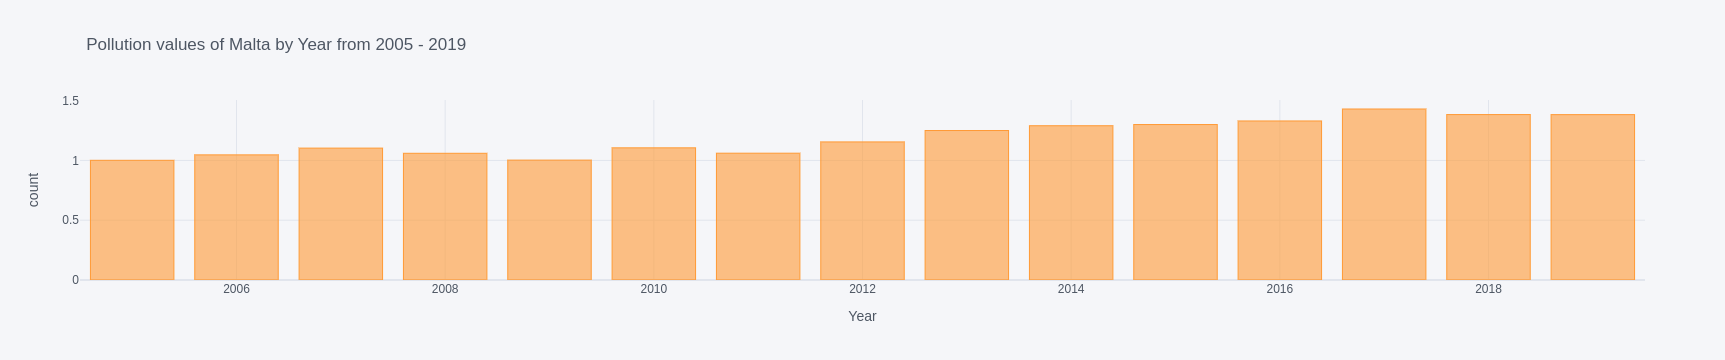

<Figure size 2880x1368 with 0 Axes>

In [40]:
MLT_pollution=data_pollution[(data_pollution['CountryLong']=='Malta')]

plt.figure(figsize=[40,19])

MLT_plot = MLT_pollution[['Year', 'ValueNumeric']].set_index(keys = 'Year')

MLT_plot.iplot(kind='bar', xTitle='Year',
                  yTitle='count', title='Pollution values of Malta by Year from 2005 - 2019')

### Find top 3 years have the highest level of pollution

Text(0, 0.5, 'Pollution Values')

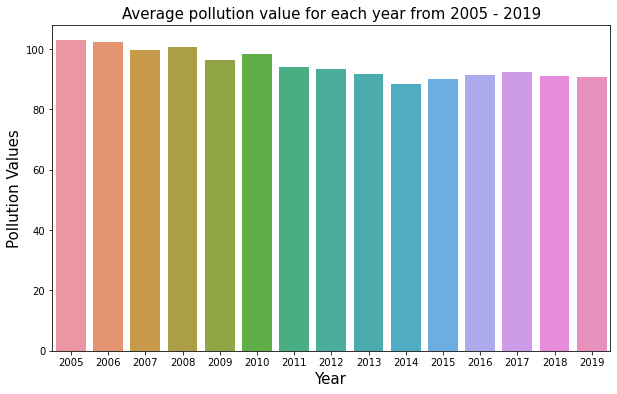

In [41]:
pollution_year = data_pollution['ValueNumeric'].groupby(data_pollution['Year']).mean()

plt.figure(figsize=[10,6])
plt.title('Average pollution value for each year from 2005 - 2019',size=15)
sns.barplot(x = pollution_year.index, y = pollution_year)
plt.xlabel('Year',size=15)
plt.ylabel('Pollution Values',size=15)

Find top 3 years have the highest average pollution values

In [42]:
pollution_year.nlargest(n = 3, keep = 'first')

Year
2005    102.958863
2006    102.260905
2008    100.540937
Name: ValueNumeric, dtype: float64

### Find top 6 countries have the highest/lowest level of pollution

Text(0, 0.5, 'Pollution Values')

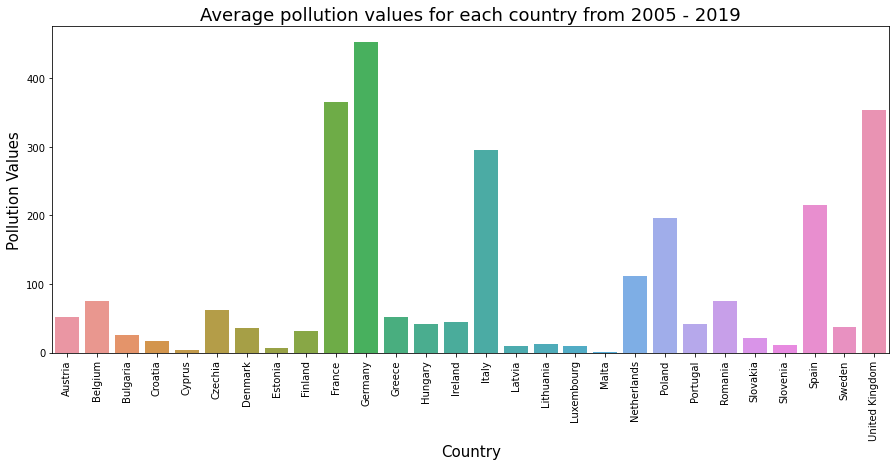

In [43]:
pollution_country = data_pollution['ValueNumeric'].groupby(data_pollution['CountryLong']).mean()

plt.figure(figsize=[15,6])
plt.title('Average pollution values for each country from 2005 - 2019',fontsize=18)
sns.barplot(x = pollution_country.index, y = pollution_country)
plt.xticks(rotation=90)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Pollution Values',fontsize=15)

Top 6 countries have the highest average pollution values

In [44]:
pollution_country.nlargest(n = 6, keep = 'first')

CountryLong
Germany           453.237084
France            365.672313
United Kingdom    354.315788
Italy             295.404069
Spain             215.472023
Poland            196.322779
Name: ValueNumeric, dtype: float64

Top 6 countries have the lowest average pollution values

In [45]:
pollution_country.nsmallest(n = 6, keep = 'first')

CountryLong
Malta          1.193281
Cyprus         4.278373
Estonia        6.213339
Latvia         8.947807
Luxembourg     9.291259
Slovenia      11.350327
Name: ValueNumeric, dtype: float64

## II. Standardised death rate (0-64) and (65+), Chronic lower respiratory diseases

### Statictical functions

Checking the correlation of one variable to another

In [46]:
sdr_master.corr()

,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1968,1.000000,0.995854,0.984440,0.981942,0.986382,0.978175,0.980250,0.976221,0.966918,0.966006,...,0.716606,0.706011,0.697643,0.692977,0.712333,0.714186,0.696562,0.690965,0.688395,0.683351
1969,0.995854,1.000000,0.989821,0.986321,0.990938,0.982406,0.983872,0.980522,0.971543,0.962628,...,0.722238,0.707505,0.699730,0.695979,0.716231,0.716634,0.698368,0.691110,0.689870,0.685166
1970,0.984440,0.989821,1.000000,0.997050,0.995533,0.986449,0.986944,0.982973,0.976451,0.963611,...,0.751314,0.737033,0.725683,0.725894,0.740961,0.741690,0.721428,0.715243,0.713093,0.707713
1971,0.981942,0.986321,0.997050,1.000000,0.994104,0.988677,0.989184,0.987054,0.979243,0.968732,...,0.747151,0.732396,0.721187,0.719764,0.733215,0.734521,0.712961,0.707264,0.704216,0.698808
1972,0.986382,0.990938,0.995533,0.994104,1.000000,0.991573,0.994146,0.990716,0.981974,0.971151,...,0.762941,0.749208,0.738311,0.738743,0.752753,0.755135,0.733930,0.730006,0.727952,0.722034
1973,0.978175,0.982406,0.986449,0.988677,0.991573,1.000000,0.998050,0.992365,0.984843,0.960721,...,0.737135,0.715611,0.701666,0.704171,0.721147,0.723543,0.699518,0.699511,0.697080,0.691727
1974,0.980250,0.983872,0.986944,0.989184,0.994146,0.998050,1.000000,0.995507,0.989467,0.968992,...,0.755947,0.737085,0.724200,0.727058,0.743633,0.745322,0.721960,0.721304,0.719013,0.713243
1975,0.976221,0.980522,0.982973,0.987054,0.990716,0.992365,0.995507,1.000000,0.994498,0.977386,...,0.772278,0.753433,0.742328,0.744852,0.760515,0.762206,0.738693,0.738391,0.735079,0.729403
1976,0.966918,0.971543,0.976451,0.979243,0.981974,0.984843,0.989467,0.994498,1.000000,0.976137,...,0.785021,0.765577,0.755786,0.761069,0.780654,0.777133,0.755649,0.753659,0.750684,0.745088
1977,0.966006,0.962628,0.963611,0.968732,0.971151,0.960721,0.968992,0.977386,0.976137,1.000000,...,0.773633,0.772080,0.766759,0.761053,0.773861,0.771438,0.756737,0.754102,0.749499,0.743499


Used this describe command to check the min max median from the dataset

In [47]:
sdr_master.describe()

,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,131.718155,136.457083,129.855595,128.907679,124.020238,128.798036,123.724821,124.169048,123.414524,117.803750,...,72.357563,71.896845,73.565298,73.127202,69.203155,73.525298,69.720476,72.483095,70.689940,70.459107
std,190.082405,196.726062,181.260872,181.231737,172.837745,185.446793,175.523639,173.733261,173.000953,165.416668,...,88.430527,87.837151,89.916621,89.034133,83.748063,87.950709,83.372017,86.635312,85.206853,84.852939
min,0.390000,0.390000,0.390000,0.390000,0.390000,0.390000,0.390000,0.390000,0.390000,0.390000,...,0.510000,0.000000,0.260000,0.230000,0.000000,0.510000,0.680000,0.680000,0.000000,0.000000
25%,7.272500,7.937500,7.292500,7.210000,6.727500,6.917500,6.655000,6.637500,6.225000,6.020000,...,2.780000,3.200000,2.795000,3.060000,2.950000,2.715000,2.677500,2.710000,2.657500,2.642500
50%,38.860000,38.920000,35.840000,33.465000,35.635000,34.340000,33.290000,31.385000,32.860000,30.355000,...,18.505000,20.320000,16.820000,16.990000,16.775000,18.405000,22.180000,20.580000,20.980000,21.200000
75%,199.030000,198.665000,192.902500,192.032500,180.902500,187.885000,183.812500,178.597500,179.392500,166.165000,...,125.025000,126.080000,132.942500,125.750000,124.902500,134.360000,130.242500,135.700000,128.055000,128.712500
max,1133.830000,1133.830000,974.860000,1016.040000,951.820000,1106.190000,1029.860000,999.220000,971.830000,876.370000,...,327.980000,337.650000,367.330000,355.440000,343.800000,339.820000,335.450000,355.000000,345.450000,343.890000


Check the dataset info like the variable is float , int , object

In [48]:
sdr_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Measure code    168 non-null    object 
 1   AGE_GRP         168 non-null    object 
 2   SEX             168 non-null    object 
 3   COUNTRY_REGION  168 non-null    object 
 4   1968            168 non-null    float64
 5   1969            168 non-null    float64
 6   1970            168 non-null    float64
 7   1971            168 non-null    float64
 8   1972            168 non-null    float64
 9   1973            168 non-null    float64
 10  1974            168 non-null    float64
 11  1975            168 non-null    float64
 12  1976            168 non-null    float64
 13  1977            168 non-null    float64
 14  1978            168 non-null    float64
 15  1979            168 non-null    float64
 16  1980            168 non-null    float64
 17  1981            168 non-null    flo

Check the toal number of rows and columns

In [49]:
sdr_master.shape

(168, 57)

Getting the all column names in the dataset

In [50]:
sdr_master.columns

Index([  'Measure code',        'AGE_GRP',            'SEX', 'COUNTRY_REGION',
                   1968,             1969,             1970,             1971,
                   1972,             1973,             1974,             1975,
                   1976,             1977,             1978,             1979,
                   1980,             1981,             1982,             1983,
                   1984,             1985,             1986,             1987,
                   1988,             1989,             1990,             1991,
                   1992,             1993,             1994,             1995,
                   1996,             1997,             1998,             1999,
                   2000,             2001,             2002,             2003,
                   2004,             2005,             2006,             2007,
                   2008,             2009,             2010,             2011,
                   2012,             2013,          

Getting the unique country regions

In [51]:
sdr_master['Country_long'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'United Kingdom'], dtype=object)

### Death rate of Malta by Year from 2005 - 2019

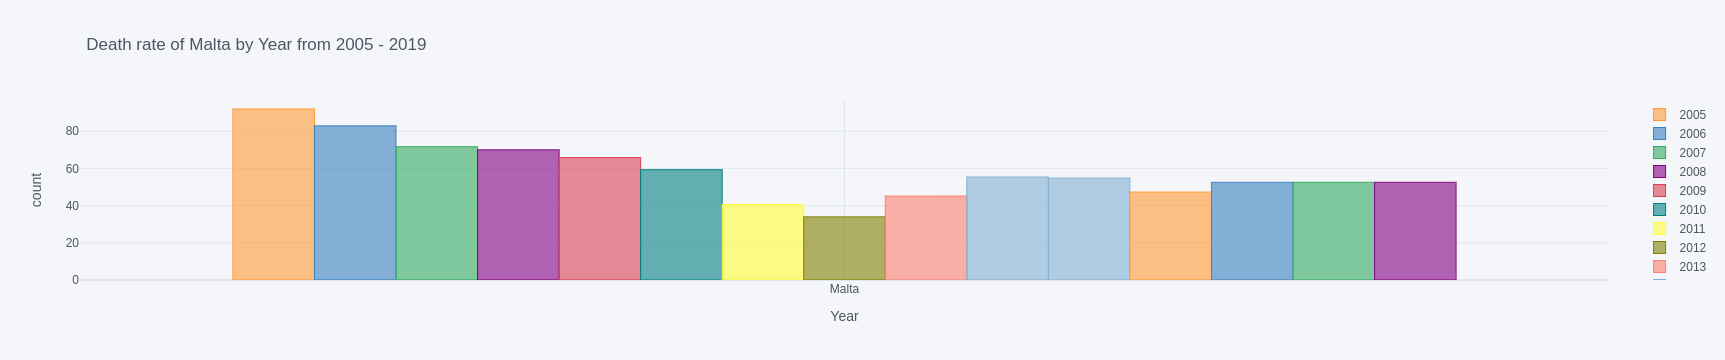

<Figure size 2880x1368 with 0 Axes>

In [52]:
MLT_data=sdr_master[(sdr_master['Country_long']=='Malta') & (sdr_master['SEX'] == 'ALL')]

plt.figure(figsize=[40,19])

MLT_group = MLT_data.groupby('Country_long').mean()
MLT_scope = MLT_group.loc[:, 2005:2019]

MLT_scope.iplot(kind='bar', xTitle='Year',
                  yTitle='count', title='Death rate of Malta by Year from 2005 - 2019')

### Top 10 Highest Disease Regions from 2005 - 2019

Top 10 Highest Disease Regions from 2005-2019

In [53]:
plt.figure(figsize=[40,19])

sdr_all = sdr_master.loc[sdr_master['SEX'] == 'ALL']

sdr_country = sdr_all.groupby('Country_long').mean()
sdr_country = sdr_country.loc[:, 2005: 2019].mean(axis =1)

region10 = sdr_country.nlargest(n=10)

region10.iplot(kind='bar', xTitle='Region',
                   yTitle='Death rate', title='Top 10 Highest Disease Regions from 2005-2019')

<Figure size 2880x1368 with 0 Axes>

In [54]:
display(region10)

Country_long
Denmark           144.615333
Ireland           118.141383
Hungary           117.650667
United Kingdom    117.409333
Netherlands        95.257000
Belgium            89.651333
Croatia            88.374333
Luxembourg         74.734333
Austria            72.972000
Romania            72.565333
dtype: float64

In [55]:
plt.figure(figsize=[40,19])
sdr_all_64 = sdr_master.loc[(sdr_master['SEX'] == 'ALL') & (sdr_master['AGE_GRP'] == '0_64')]

sdr_country_64 = sdr_all_64.groupby('Country_long').mean()

sdr_country_64 = sdr_country_64.loc[:, 2005: 2019].mean(axis =1)

region10_64 = sdr_country_64.nlargest(n=10)

region10_64.iplot(kind='bar', xTitle='Region',
                   yTitle='Death rate', title='Top 10 Highest Disease Regions with Age 0-64 from 2005-2019')

<Figure size 2880x1368 with 0 Axes>

In [56]:
plt.figure(figsize=[40,19])
sdr_all_65 = sdr_master.loc[(sdr_master['SEX'] == 'ALL') & (sdr_master['AGE_GRP'] == "GTE65")]

sdr_country_65 = sdr_all_65.groupby('Country_long').mean()
sdr_country_65 = sdr_country_65.loc[:, 2005: 2019].mean(axis =1)

region10_65 = sdr_country_65.nlargest(n=10)

region10_65.iplot(kind='bar', xTitle='Region',
                   yTitle='Death rate', title='Top 10 Highest Disease Regions with Age 65+ from 2005-2019')

<Figure size 2880x1368 with 0 Axes>

### Top 10 Lowest Disease Regions from 2005 - 2019

In [57]:
plt.figure(figsize=[40,19])

sregion10=sdr_country.nsmallest(n=10)

sregion10.iplot(kind='bar', xTitle='Region',
                  yTitle='Death rate', title='Top 10 Lowest Disease Regions from 2005-2019')

<Figure size 2880x1368 with 0 Axes>

In [58]:
plt.figure(figsize=[40,19])

sregion10_64 = sdr_country_64.nsmallest(n=10)

sregion10_64.iplot(kind='bar', xTitle='Region',
                  yTitle='Death rate', title='Top 10 Lowest Disease Regions with Age 0-64 from 2005-2019')

<Figure size 2880x1368 with 0 Axes>

In [59]:
plt.figure(figsize=[40,19])

sregion10_65 = sdr_country_65.nsmallest(n=10)

sregion10_65.iplot(kind='bar', xTitle='Region',
                  yTitle='Death rate', title='Top 10 Lowest Disease Regions with Age 65+ from 2005-2019')

<Figure size 2880x1368 with 0 Axes>

### Ratio By Sex From Top 3 Disease Regions from 2005 - 2019

As we can see we have high ration in these three regions 'Hungary' 'Denmark' 'Ireland' so let's plot these regions to check out either 
we have male high disease ratio or female high disease ration for the age [group 0_64].

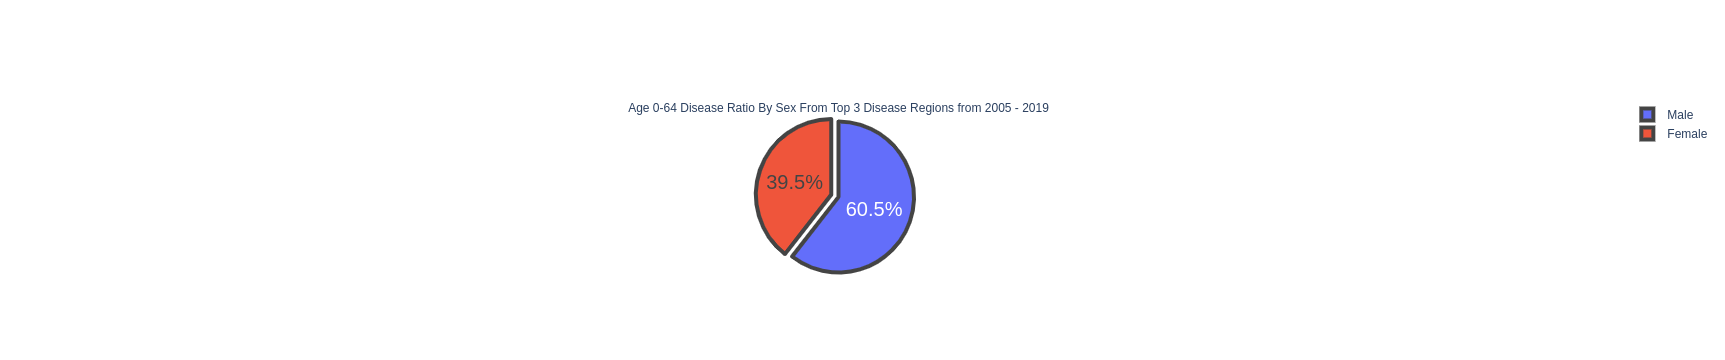

In [60]:
def sdr_country (country, age, sex):
    sdr_c = sdr_master.loc[(sdr_master['Country_long'] == country) & (sdr_master['AGE_GRP'] == age) & (sdr_master['SEX'] == sex)].groupby('SEX').mean()
    sdr_c = sdr_c.loc[:, 2005: 2019]
    sdr_c = sdr_c.sum().sum()
    return sdr_c

list_male = [sdr_country("Hungary", "0_64", "MALE"), sdr_country("Denmark", "0_64", "MALE"), sdr_country("Ireland", "0_64", "MALE")]
list_female = [sdr_country("Hungary", "0_64", "FEMALE"), sdr_country("Denmark", "0_64", "FEMALE"), sdr_country("Ireland", "0_64", "FEMALE")]
values=[np.sum(list_male),np.sum(list_female)]
labels=['Male','Female']
fig=go.Figure(go.Pie(labels=labels,values=values,title=('Age 0-64 Disease Ratio By Sex From Top 3 Disease Regions from 2005 - 2019'),textfont_size=20,marker_line_width=4,marker_line_color='dark blue',pull=[0,0.1]))
fig.show()

As we can see we have high ration in these three regions 'Denmark' 'Ireland' 'United Kingdom' so let's plot these regions to check out either 
we have male high disease ratio or female high disease ration for the age group 65_more.

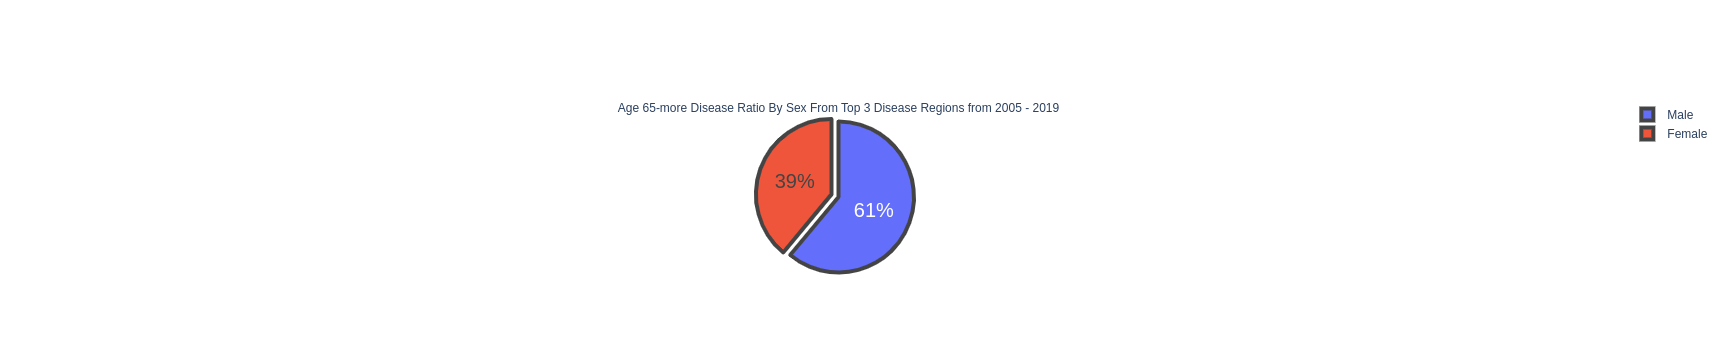

In [61]:
list_male = [sdr_country("Denmark", "GTE65", "MALE"), sdr_country("Ireland", "GTE65", "MALE"), sdr_country("Hungary", "GTE65", "MALE")]
list_female = [sdr_country("Denmark", "GTE65", "FEMALE"), sdr_country("Ireland", "GTE65", "FEMALE"), sdr_country("Hungary", "GTE65", "FEMALE")]
values=[np.sum(list_male),np.sum(list_female)]
labels=['Male','Female']
fig=go.Figure(go.Pie(labels=labels,values=values,title=('Age 65-more Disease Ratio By Sex From Top 3 Disease Regions from 2005 - 2019'),textfont_size=20,marker_line_width=4,marker_line_color='dark blue',pull=[0,0.1]))
fig.show()

### Ratio By Sex From All Regions from 2005 - 2019

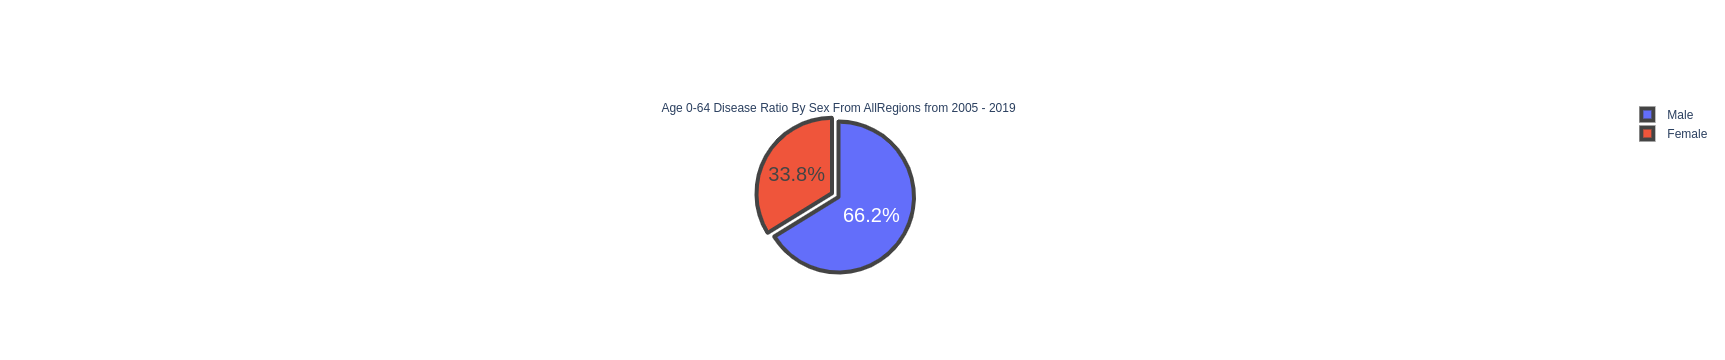

In [62]:
countries = sdr_master['Country_long'].unique()

def list_gender(age, gender):
    list_g = [sdr_country(country, age, gender) for country in countries ]
    return list_g

list_male = list_gender("0_64", "MALE")
list_female = list_gender("0_64", "FEMALE")
values=[np.sum(list_male),np.sum(list_female)]
labels=['Male','Female']
fig=go.Figure(go.Pie(labels=labels,values=values,title=('Age 0-64 Disease Ratio By Sex From AllRegions from 2005 - 2019'),textfont_size=20,marker_line_width=4,marker_line_color='dark blue',pull=[0,0.1]))
fig.show()

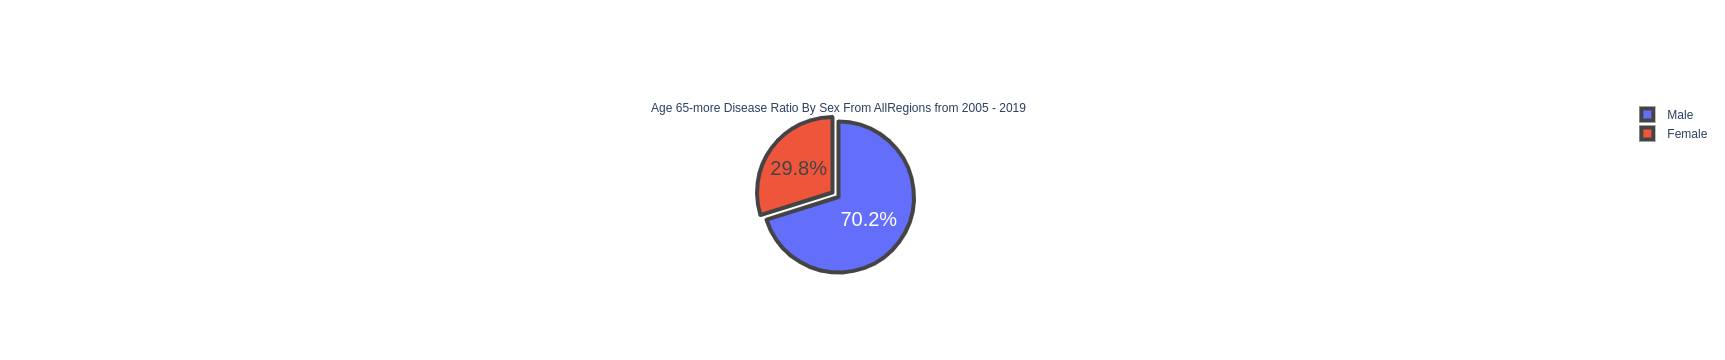

In [63]:
list_male = list_gender("GTE65", "MALE")
list_female = list_gender("GTE65", "FEMALE")
values=[np.sum(list_male),np.sum(list_female)]
labels=['Male','Female']
fig=go.Figure(go.Pie(labels=labels,values=values,title=('Age 65-more Disease Ratio By Sex From AllRegions from 2005 - 2019'),textfont_size=20,marker_line_width=4,marker_line_color='dark blue',pull=[0,0.1]))
fig.show()

### Average of Disease by Year from 2005 - 2019

Now we're going to take average of all the years to check out which year we have highest ratio of disease and then plot it using plotly module

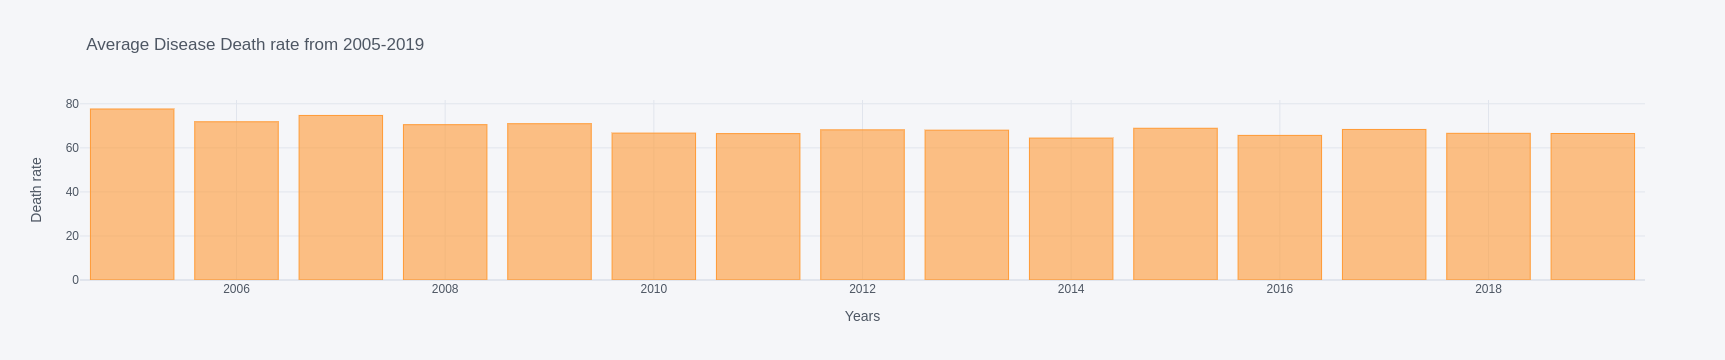

In [64]:
sdr_mean=sdr_all.loc[:, 2005: 2019].mean()
sdr_mean.iplot(kind='bar', xTitle='Years',
                   yTitle='Death rate', title='Average Disease Death rate from 2005-2019')

Top 3 years have the highest average of disease

In [65]:
sdr_mean.sort_values(ascending=False)[:3]

2005    77.625201
2007    74.701607
2006    71.824843
dtype: float64